In [1]:
import xarray as xr
import numpy as np
import xesmf as xe
import metpy
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
plate = ccrs.PlateCarree()

In [3]:
fname = '/Volumes/Minuet/research/GOES-17/AODC/2020/011/20/OR_ABI-L2-AODC-M6_G17_s20200112026177_e20200112028550_c20200112030115.nc'

with xr.open_dataset(fname) as ds:
    ds.load()
    
sath = ds.goes_imager_projection.perspective_point_height
proj = ds.metpy.parse_cf('AOD').metpy.cartopy_crs

with xr.open_dataset('/Volumes/Minuet/research/ERA5/era5_pblh_2018.nc') as ds2:
    ds2.load()

In [4]:
xs, ys = np.meshgrid(ds.x*sath, ds.y*sath)

In [5]:
transformed = plate.transform_points(src_crs=proj, x=xs, y=ys)

In [6]:
ds = ds.assign_coords({
        "lat":(["y","x"],transformed[:,:,1]),
        "lon":(["y","x"],transformed[:,:,0])
    })
ds.lat.attrs["units"] = "degrees_north"
ds.lon.attrs["units"] = "degrees_east"

In [7]:
ds

<xarray.Dataset>
Dimensions:                                                 (y: 1500, x: 2500,
                                                             number_of_time_bounds: 2,
                                                             number_of_image_bounds: 2,
                                                             number_of_sunglint_angle_bounds: 2,
                                                             number_of_LZA_bounds: 2,
                                                             number_of_SZA_bounds: 2,
                                                             land_sensor_bands: 3,
                                                             sea_sensor_bands: 4,
                                                             latitude_bands: 18,
                                                             number_of_latitude_band_bounds: 2,
                                                             num_area_types: 2)
Coordinates: (12/14)
    t                                                       datetime64[ns] 20...
  * y                                                       (y) float64 0.128...
  * x                                                       (x) float64 -0.06...
    y_image                                                 float32 0.08624
    x_image                                                 float32 0.0
    sunglint_angle                                          float32 40.0
    ...                                                      ...
    retrieval_solar_zenith_angle                            float32 90.0
    quantitative_solar_zenith_angle                         float32 80.0
    aod_product_wavelength                                  float32 0.55
  * latitude_bands                                          (latitude_bands) float32 ...
    lat                                                     (y, x) float64 53...
    lon                                                     (y, x) float64 17...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_sunglint_angle_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds,
                                land_sensor_bands, sea_sensor_bands,
                                number_of_latitude_band_bounds, num_area_types
Data variables: (12/59)
    AOD                                                     (y, x) float32 na...
    DQF                                                     (y, x) float32 na...
    time_bounds                                             (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                                  int32 -2147483647
    y_image_bounds                                          (number_of_image_bounds) float32 ...
    x_image_bounds                                          (number_of_image_bounds) float32 ...
    ...                                                      ...
    lat_band_min_aod550_sea                                 (latitude_bands) float32 ...
    lat_band_max_aod550_sea                                 (latitude_bands) float32 ...
    lat_band_mean_aod550_sea                                (latitude_bands) float32 ...
    lat_band_std_dev_aod550_sea                             (latitude_bands) float32 ...
    percent_uncorrectable_GRB_errors                        float64 0.0
    percent_uncorrectable_L0_errors                         float64 0.0
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2020-01-11T20:26:17.7Z
    time_coverage_end:         2020-01-1

In [8]:
b = ds.drop_vars(
    ['y_image','x_image','sunglint_angle','retrieval_local_zenith_angle',
     'quantitative_local_zenith_angle','retrieval_solar_zenith_angle','quantitative_solar_zenith_angle',
     'aod_product_wavelength', 'latitude_bands'])[
        ['AOD', 'DQF', 'goes_imager_projection',
         'aod550_retrievals_attempted_land','aod550_good_LZA_retrievals_attempted','aod550_outlier_pixel_count','min_aod550_land','max_aod550_land','mean_aod550_land','std_dev_aod550_land',
        ]
    ]

b = b.assign(x=b.x*sath, y=b.y*sath)

In [9]:
b

<xarray.Dataset>
Dimensions:                               (y: 1500, x: 2500)
Coordinates:
    t                                     datetime64[ns] 2020-01-11T20:27:36....
  * y                                     (y) float64 4.588e+06 ... 1.584e+06
  * x                                     (x) float64 -2.504e+06 ... 2.504e+06
    lat                                   (y, x) float64 53.5 53.49 ... 14.81
    lon                                   (y, x) float64 175.6 175.7 ... -112.4
Data variables:
    AOD                                   (y, x) float32 nan nan ... 0.3485
    DQF                                   (y, x) float32 nan nan nan ... 1.0 2.0
    goes_imager_projection                int32 -2147483647
    aod550_retrievals_attempted_land      float64 5.329e+05
    aod550_good_LZA_retrievals_attempted  float64 424.0
    aod550_outlier_pixel_count            float64 7.143e+03
    min_aod550_land                       float64 -0.05
    max_aod550_land                       float64 1.124
    mean_aod550_land                      float64 0.06337
    std_dev_aod550_land                   float64 0.0922
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2020-01-11T20:26:17.7Z
    time_coverage_end:         2020-01-11T20:28:55.0Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        018ce0f9-8253-456b-bbb8-c417c0cf9b41

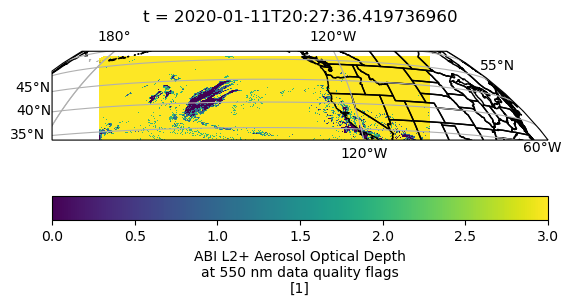

In [10]:
fig, ax = plt.subplots(subplot_kw=dict(projection=proj))

b.DQF.plot(ax=ax, cbar_kwargs=dict(orientation='horizontal'))

ax.coastlines(alpha=0.3, lw=0.5)
ax.add_feature(cfeature.STATES)
ax.gridlines(draw_labels=True)
ax.set_extent([-180, -60, 37, 53], plate)

In [11]:
ds2 = ds2.rename({"longitude": "lon", "latitude": "lat"})

In [13]:
sub = b.isel(x=slice(2001,2501), y=slice(1001,1501))

In [15]:
regridder = xe.Regridder(ds2, sub, "bilinear", unmapped_to_nan=True)

/usr/local/Caskroom/miniconda/base/envs/test/lib/python3.10/site-packages/xesmf/backend.py:38: UserWarning: Input array is not F_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not F_CONTIGUOUS. ' 'Will affect performance.')


In [16]:
dr_out = regridder(ds2)

In [17]:
dr_out

<xarray.Dataset>
Dimensions:                 (time: 8760, y: 499, x: 499)
Coordinates:
  * time                    (time) datetime64[ns] 2018-01-01 ... 2018-12-31T2...
    t                       datetime64[ns] 2020-01-11T20:27:36.419736960
  * y                       (y) float64 2.582e+06 2.58e+06 ... 1.584e+06
  * x                       (x) float64 1.506e+06 1.508e+06 ... 2.504e+06
    lon                     (y, x) float64 -121.6 -121.5 ... -112.5 -112.4
    lat                     (y, x) float64 24.65 24.65 24.65 ... 14.8 14.8 14.81
    goes_imager_projection  int32 -2147483647
Data variables:
    blh                     (time, y, x) float32 635.5 635.6 ... 889.5 885.2
Attributes:
    regrid_method:  bilinear

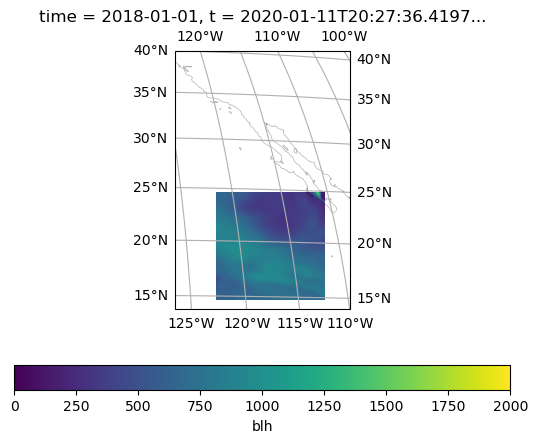

In [29]:
fig, ax = plt.subplots(subplot_kw=dict(projection=proj))

dr_out.blh.isel(time=0).plot(vmin=0, vmax=2000, ax=ax, cbar_kwargs=dict(orientation='horizontal'))

ax.coastlines(alpha=0.3, lw=0.5)
ax.gridlines(draw_labels=True)
ax.set_extent([-123, -110, 14, 40], plate)

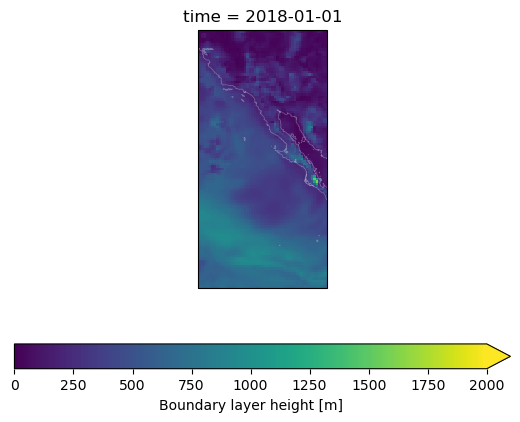

In [19]:
fig, ax = plt.subplots(subplot_kw=dict(projection=plate))

ds2.isel(time=0).blh.plot(vmin=0, vmax=2000, ax=ax, cbar_kwargs=dict(orientation='horizontal'), transform=plate)

ax.coastlines(color='white', alpha=0.3, lw=0.5)
# ax.gridlines(draw_labels=True)
ax.set_extent([-123, -110, 14, 40], plate)

In [34]:
a = ds.assign(x=ds.x*sath, y=ds.y*sath)

In [36]:
a['blh'] = dr_out.drop_vars(['goes_imager_projection']).blh.isel(time=0)

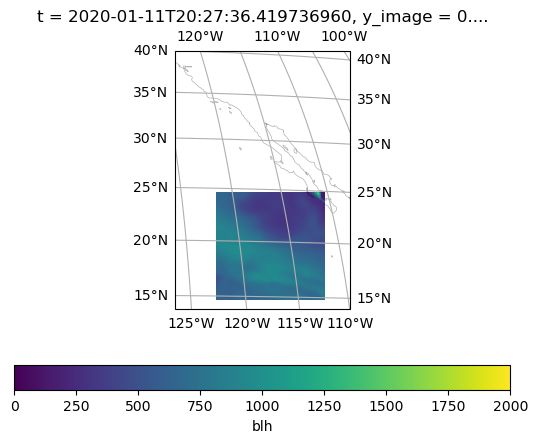

In [37]:
fig, ax = plt.subplots(subplot_kw=dict(projection=proj))

a.blh.plot(vmin=0, vmax=2000, ax=ax, cbar_kwargs=dict(orientation='horizontal'))

ax.coastlines(alpha=0.3, lw=0.5)
ax.gridlines(draw_labels=True)
ax.set_extent([-123, -110, 14, 40], plate)

In [ ]:
a = ds.assign(x=ds.x*sath, y=ds.y*sath)

In [76]:
a['blh'] = xr.full_like(a.AOD, fill_value=np.nan)

In [78]:
import warnings
warnings.filterwarnings('ignore')

dx = 500
dy = 500
# for i in range(int(b.x.shape[0] / dx)):
for i in range(4, 5):
    for j in range(int(b.y.shape[0] / dy)):
        sub = b.isel(x=slice(i * 500, (i+1)*500), y=slice(j * 500, (j+1)*500))
        regridder = xe.Regridder(ds2, sub, "bilinear", unmapped_to_nan=True)
        out = regridder(ds2)
        a['blh'].loc[dict(x=out.x, y=out.y)] = out.drop_vars(['goes_imager_projection']).blh.isel(time=0)

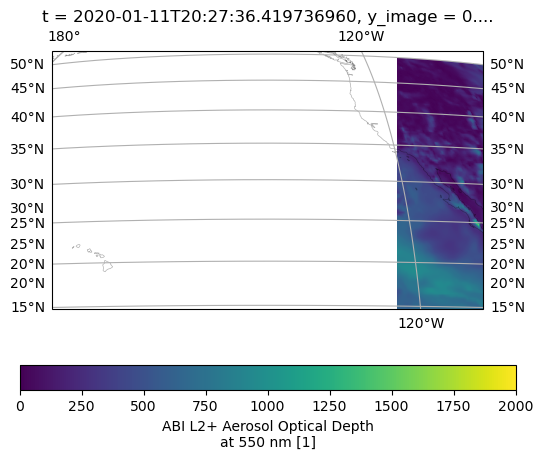

In [79]:
fig, ax = plt.subplots(subplot_kw=dict(projection=proj))

a.blh.plot(vmin=0, vmax=2000, ax=ax, cbar_kwargs=dict(orientation='horizontal'))

ax.coastlines(alpha=0.3, lw=0.5)
ax.gridlines(draw_labels=True)
# ax.set_extent([-123, -110, 14, 40], plate)

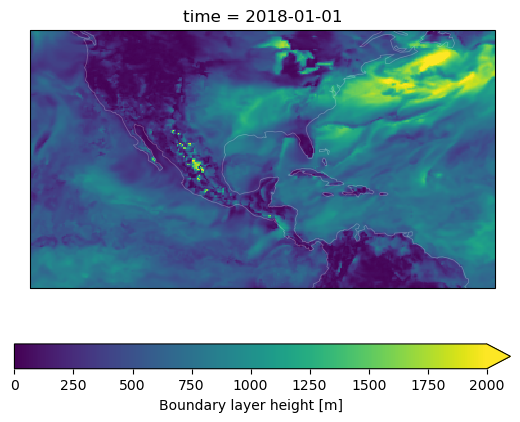

In [80]:
fig, ax = plt.subplots(subplot_kw=dict(projection=plate))

ds2.isel(time=0).blh.plot(vmin=0, vmax=2000, ax=ax, cbar_kwargs=dict(orientation='horizontal'), transform=plate)

ax.coastlines(color='white', alpha=0.3, lw=0.5)
# ax.gridlines(draw_labels=True)
# ax.set_extent([-123, -110, 14, 40], plate)